# <center>**CONSTRUCTION ET VISUALISATION D’UN MODELE D'ARBRE DE DECISION**

<center>Josué AFOUDA

# <font color=red> Objectif du tutoriel


**A travers ce tutoriel, vous apprendrez à créer un visuel de votre modèle d'arbre de décision**. 

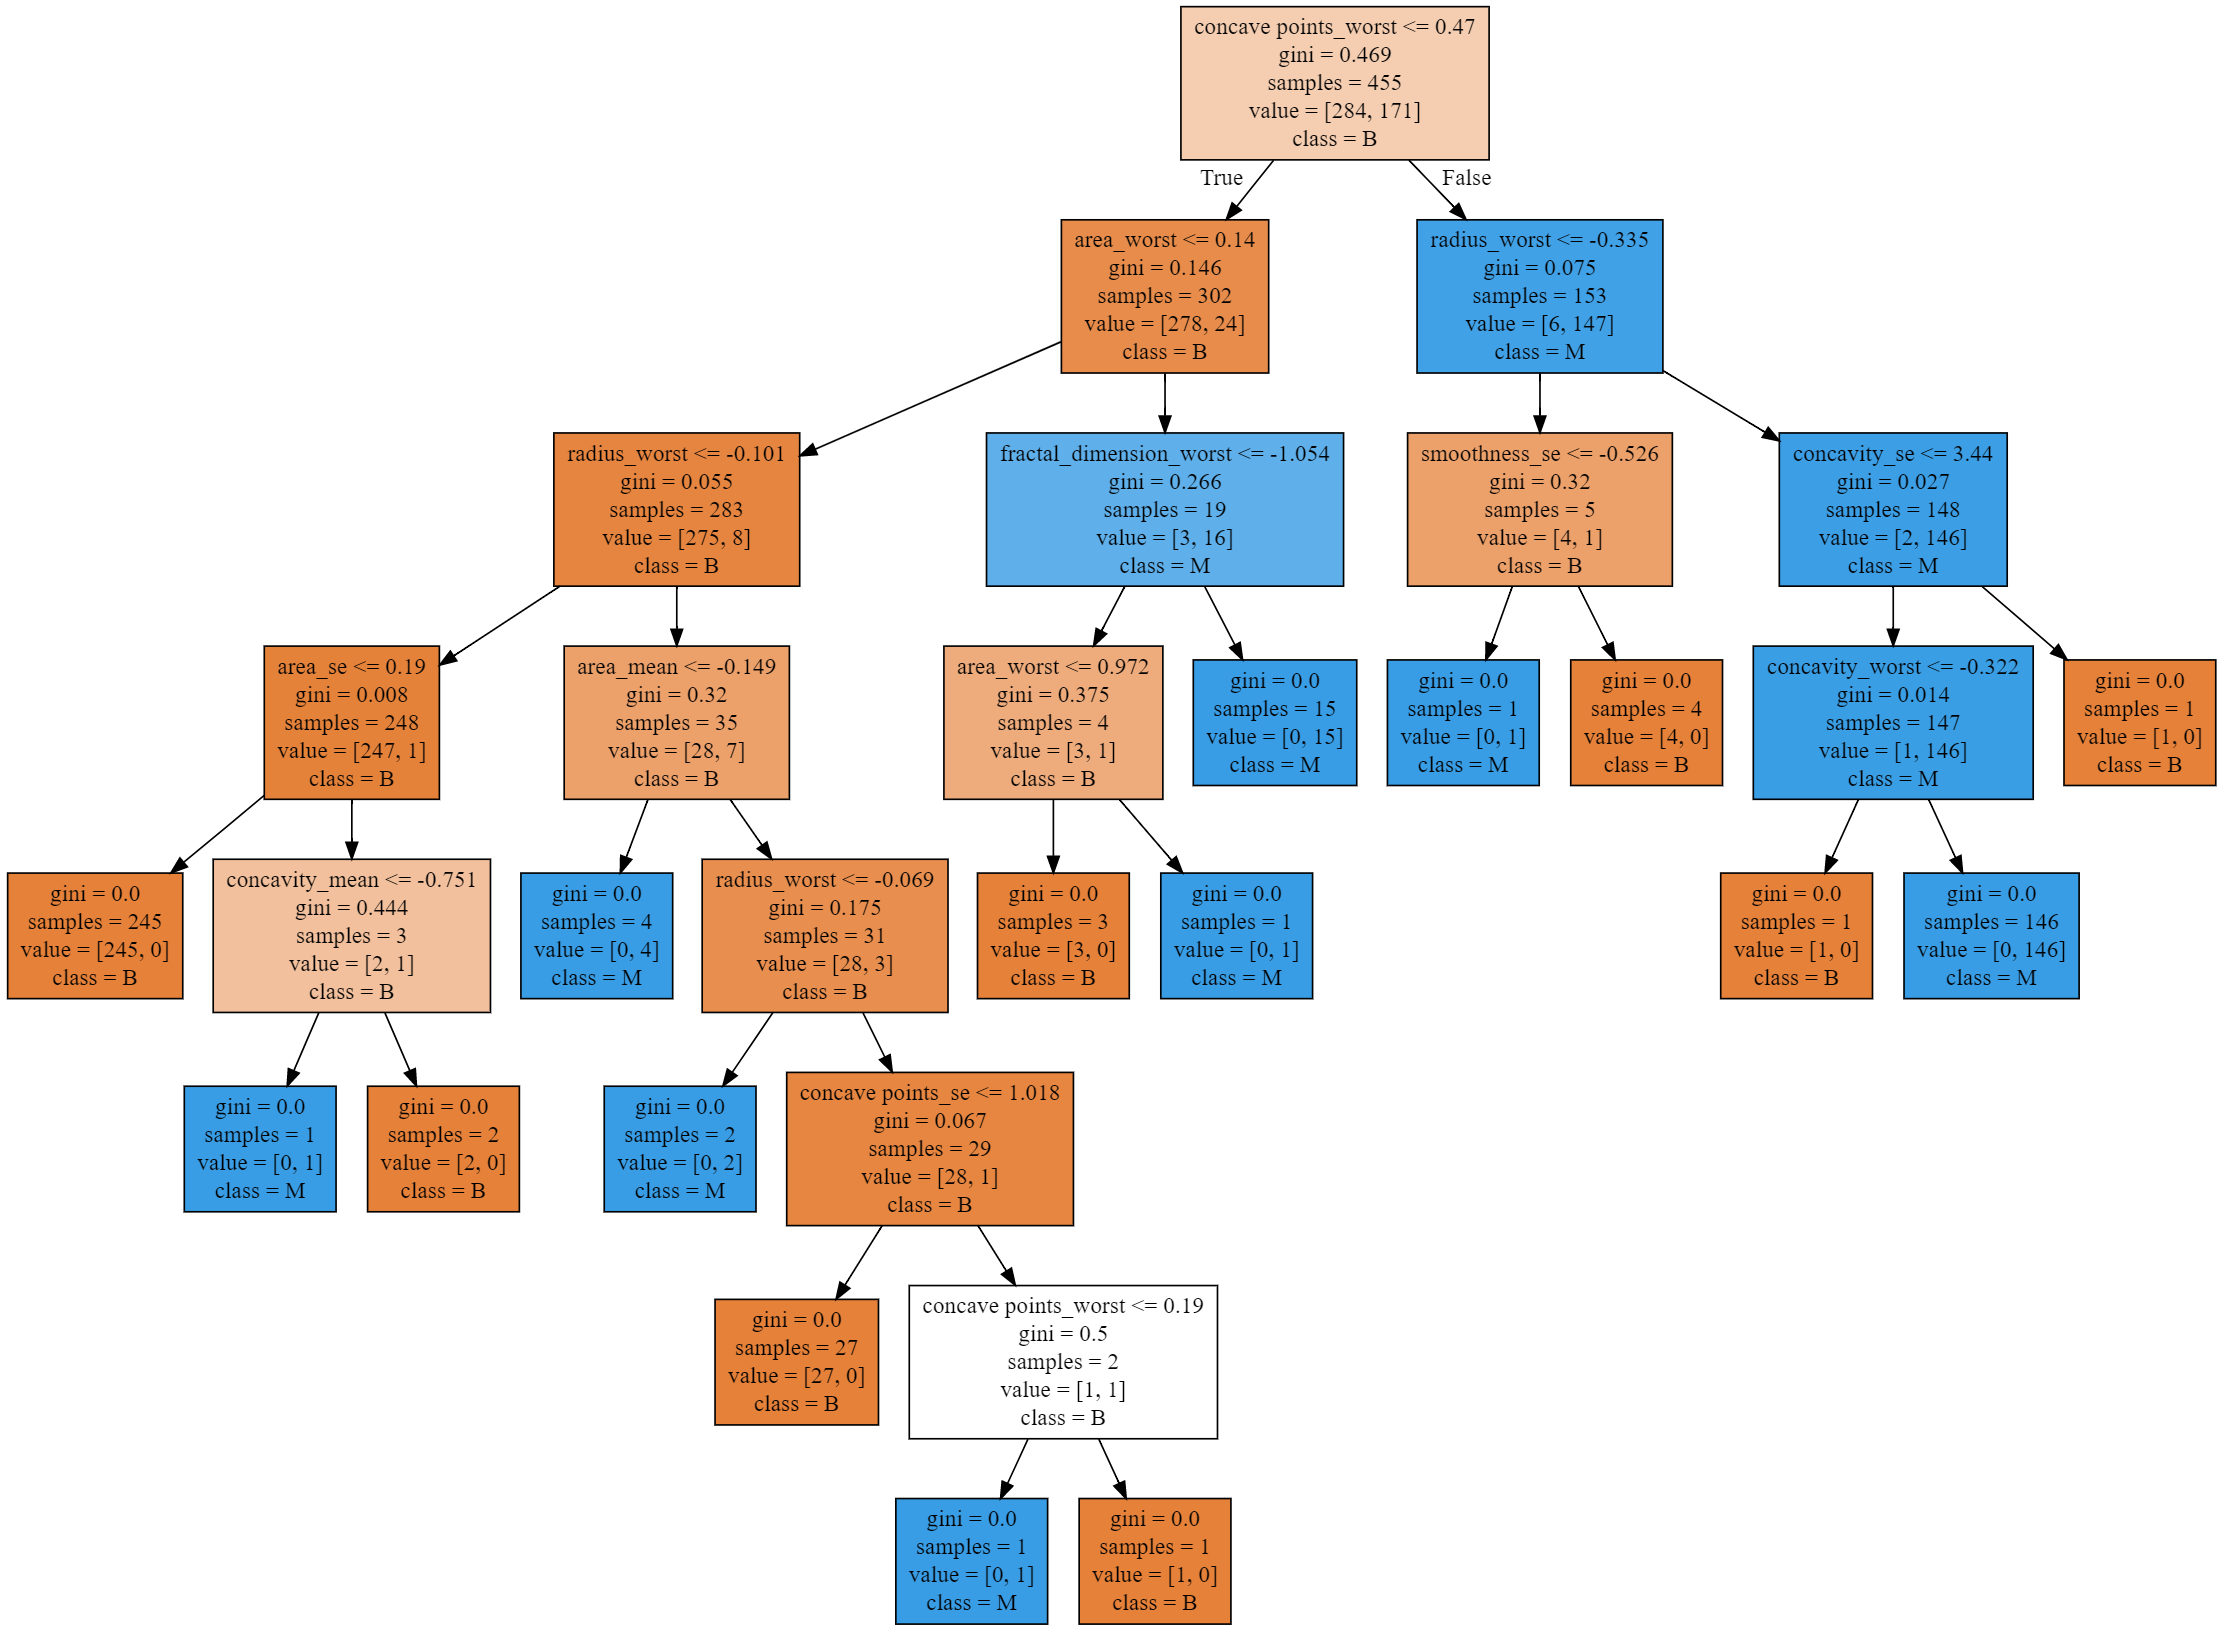

# <font color=red> Importation des outils et des données

Les données utilisées dans le cadre de ce projet, proviennent de [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconcin-data). Il s’agit de la base de données diagnostic du cancer du sein du Wisconsin aux USA. Ces données sont également disponibles dans le module [datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) de sklearn.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# Importation des données

df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/TUTORIALS/main/cancer.csv')

# Affichage de df

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Structure de la dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# <font color=red> Analyse exploratoire des données

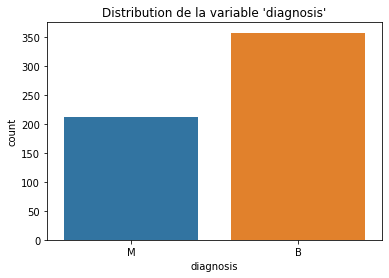

In [4]:
# Diagramme à barre de la variable 'diagnosis'

sns.countplot('diagnosis', data = df).set_title("Distribution de la variable 'diagnosis'");

# <font color=red> Préparation des données

Commençons d'abord par supprimer les variables 'id' et 'Unnamed: 32' qui ne nous fournissent pas d'informations importantes à l'analyse et à la modélisation.

In [5]:
# Suppression des variables 'id' et 'Unnamed: 32'

df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [6]:
# Variable cible

y = df['diagnosis']

# variables indépendantes

X = df.drop('diagnosis', axis = 1)

# <font color=red> Modélisation

In [7]:
# Données d'entraînement (80%) et données de test (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1111)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [8]:
# Création d'un modèle d'arbre de décision

tree_model = DecisionTreeClassifier()

# Entraînement du modèle

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
# Précision globale sur les données d'entraînement

tree_model.score(X_train, y_train)

1.0

In [10]:
# Précision globale sur les données de test

tree_model.score(X_test, y_test)

0.9298245614035088

In [11]:
# Visualisation du modèle d'arbre de décision

export_graphviz(tree_model, out_file='tree.dot', feature_names=X.columns, 
               class_names=['B', 'M'], filled = True)

Le code ci-dessus produit un fichier *tree.dot* enregistré dans le dossier où se trouve ce notebook. Pour convertir ce fichier en un fichier image, nous avons réalisé les étapes ci-dessous :

* **ouverture de *tree.dot* avec un éditeur de code (jupyter notebook, bloc-notes, sublime text, etc.)** ;

* **copie du code entier du fichier 'tree.dot'** ;

* **conversion du code en fichier image avec ce** [converisseur en ligne](https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D).

On obtient finalement une image de l'arbre de décision : *graphviz_tree_model*.

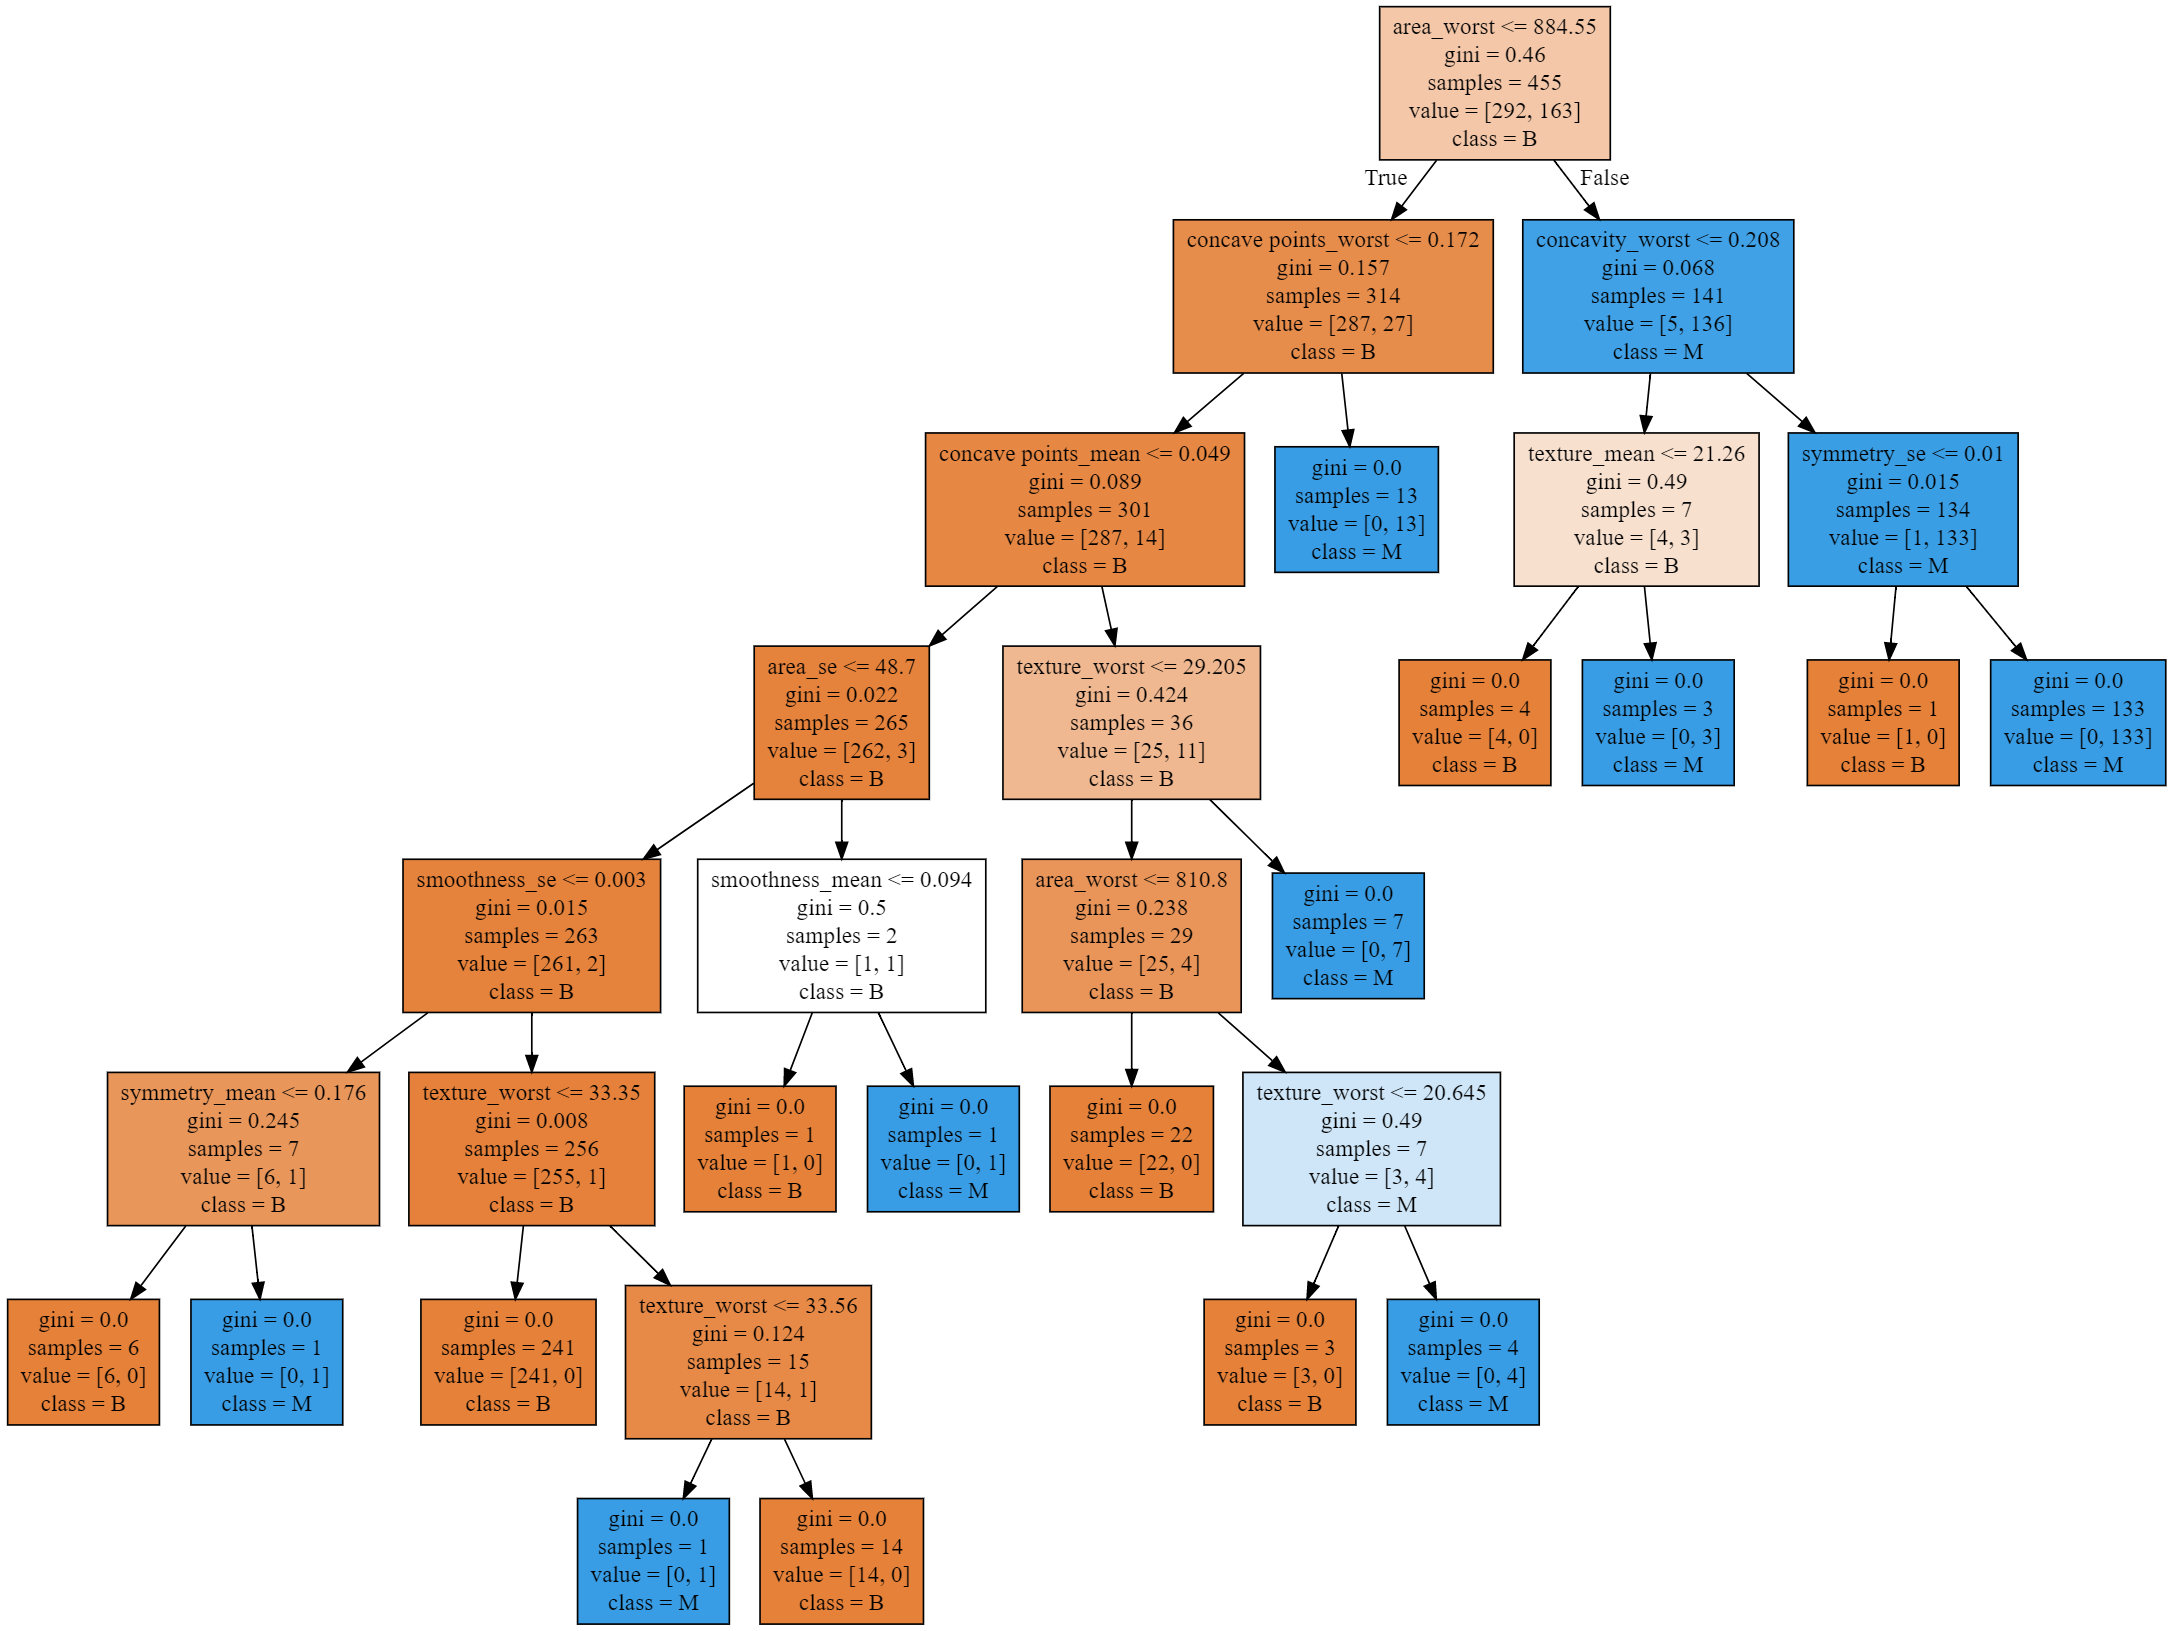

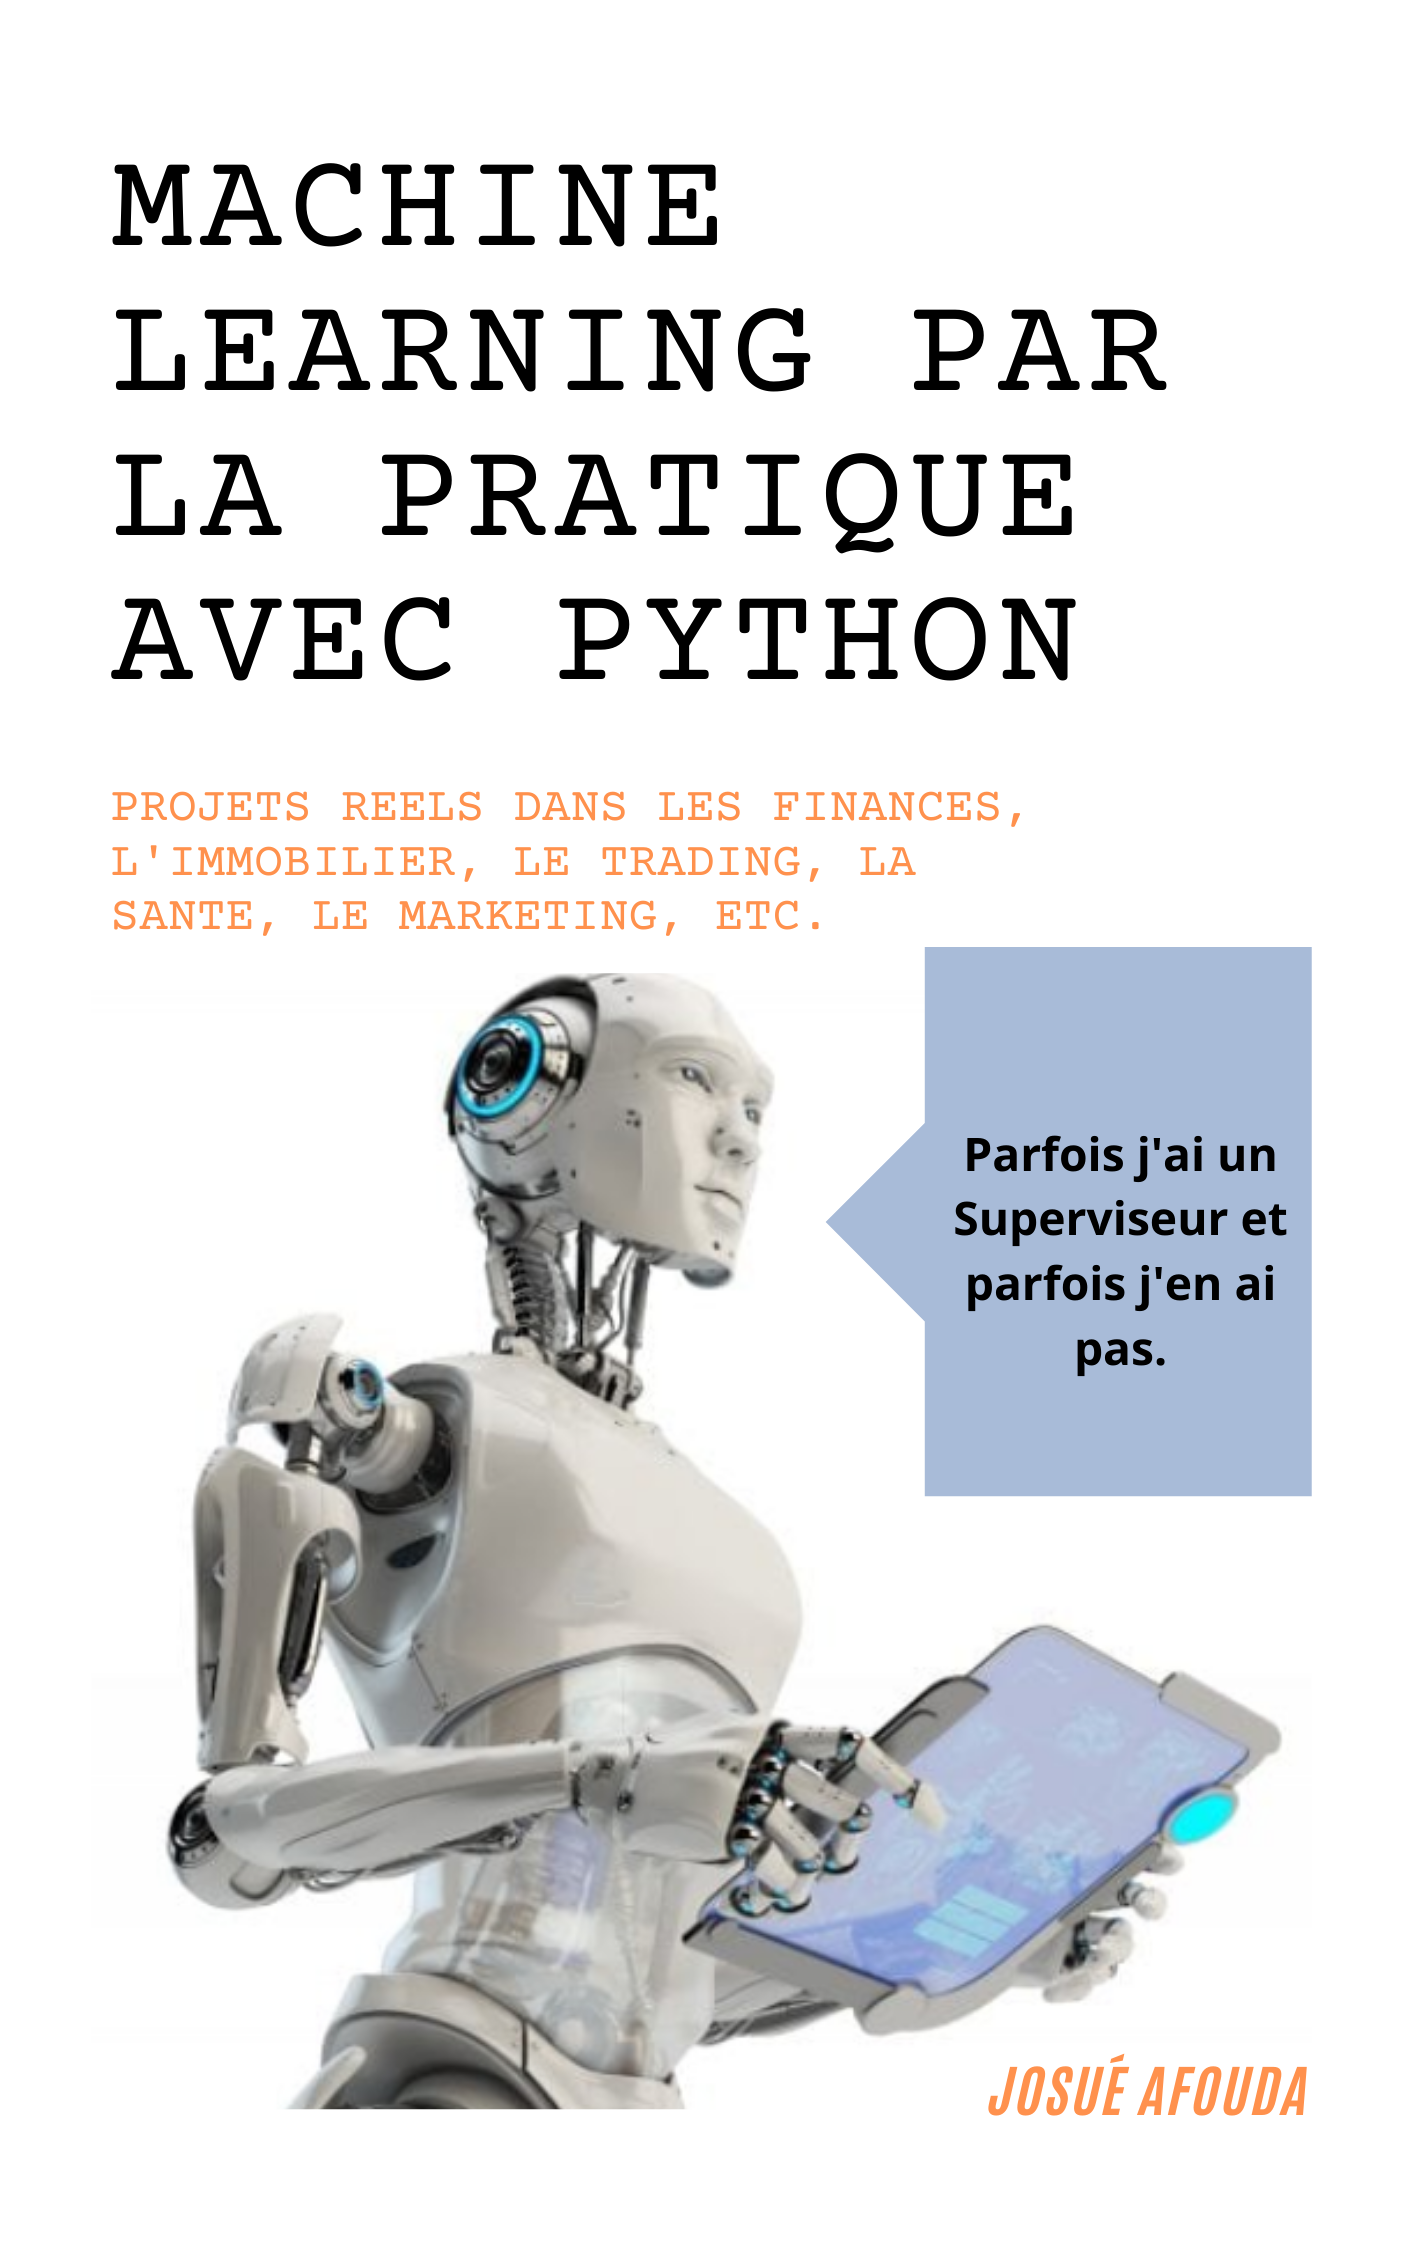

A travers ce livre, vous apprendrez à : 

✅ Utiliser la librairie Scikit-Learn destinée à l’apprentissage automatique dans Python ; 

✅ Résoudre des problèmes de Classification et de Régression ; 

✅ Construire un modèle de prévision des futures valeurs d’une série temporelle ; 

✅ Utiliser les algorithmes populaires dans le monde réel comme Linear Regression, Random Forest, Logistic Regression, KMeans, etc. ; 

✅ Choisir le(s) métrique(s) convenable(s) pour l’évaluation de la performance d’un modèle de Machine Learning ; 

✅ Valider efficacement un modèle à l’aide de techniques comme cross-validation ; 

✅ Rechercher les hyperparamètres optimaux d’un modèle de Machine Learning ; 

✅ Réduire la dimension d’un ensemble de données avec l’Analyse en Composantes Principales ; 

✅ Automatiser le flux de travail d’un projet de Machine Learning ; 

✅ Utiliser des outils d’assistance intelligente comme TPOT dans la construction d’un modèle de Machine Learning, etc.

Ce livre est disponible en version numérique ([Format Kindle](https://www.amazon.fr/gp/product/B08F4NZZ1C/ref=dbs_a_def_rwt_hsch_vapi_tkin_p1_i1)) et en version papier ([Broché](https://www.amazon.fr/Machine-Learning-pratique-avec-Python/dp/B08DV8X9D2/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=&sr=)) à un prix promotionnel. Vous pouvez cliquer sur le lien ci-dessous pour devenir expert du MACHINE LEARNING.